In [1]:
%matplotlib inline


import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
    RobustScaler, QuantileTransformer, PowerTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, \
    RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, \
    GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, \
    KBinsDiscretizer, OrdinalEncoder 
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')

## Работа с признаками

- Попробуйте разные способы работы с недостающими признаками: удаление, присвоение наиболее правдоподобного значения, введение новой категории для недостающих признаков.

- Попробуйте разные методы подготовки признаков.

- Примените SVM к датасету [Adult](https://archive.ics.uci.edu/ml/datasets/Adult), попробуйте все доступные ядра, подберите для них параметры.

- Подберите лучшую модель для датасета Adult.

In [4]:
train_url_adult = 'https://raw.githubusercontent.com/Katalinach/ML-Datasets/master/adult_train.csv?token=ANTWLAABFUFCLHVFP7YCZ4C7GWCQM'
train_df_adult = pd.read_csv(train_url_adult)

In [5]:
test_url_adult = 'https://raw.githubusercontent.com/Katalinach/ML-Datasets/master/adult_test.csv?token=ANTWLAFGIT6LH3Y7URRNC627GWCSS'
test_df_adult = pd.read_csv(test_url_adult)

In [6]:
# возьмем датасет целиком

size_adult = train_df_adult.shape[0]
df_adult = pd.concat([train_df_adult, test_df_adult], axis=0)

In [7]:
df_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_adult.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df_adult.info() # общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
df_adult.nunique() # количество уникальных значений признака

age                  74
workclass             9
fnlwgt            28523
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
class                 2
dtype: int64

In [11]:
# количество недостающих значений для каждого признака

print('Недостающие признаки по классам:')
print('-' * 32)

for column in list(df_adult.columns):
  print(column + ':', df_adult[df_adult[column]=='?'][column].count())

Недостающие признаки по классам:
--------------------------------
age: 0
workclass: 2799
fnlwgt: 0
education: 0
education_num: 0
marital_status: 0
occupation: 2809
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 857
class: 0


###О датасете:
- 48842 объектов
- присутствуют как числовые, так и категориальные признаки
- признаки 'workclass', 'occupation' и 'native-country' имеют пропущенные значения

In [ ]:
col_var = ['age', 'fnlwgt', 'education_num', 'hours-per-week', 'capital-gain', 'capital-loss']

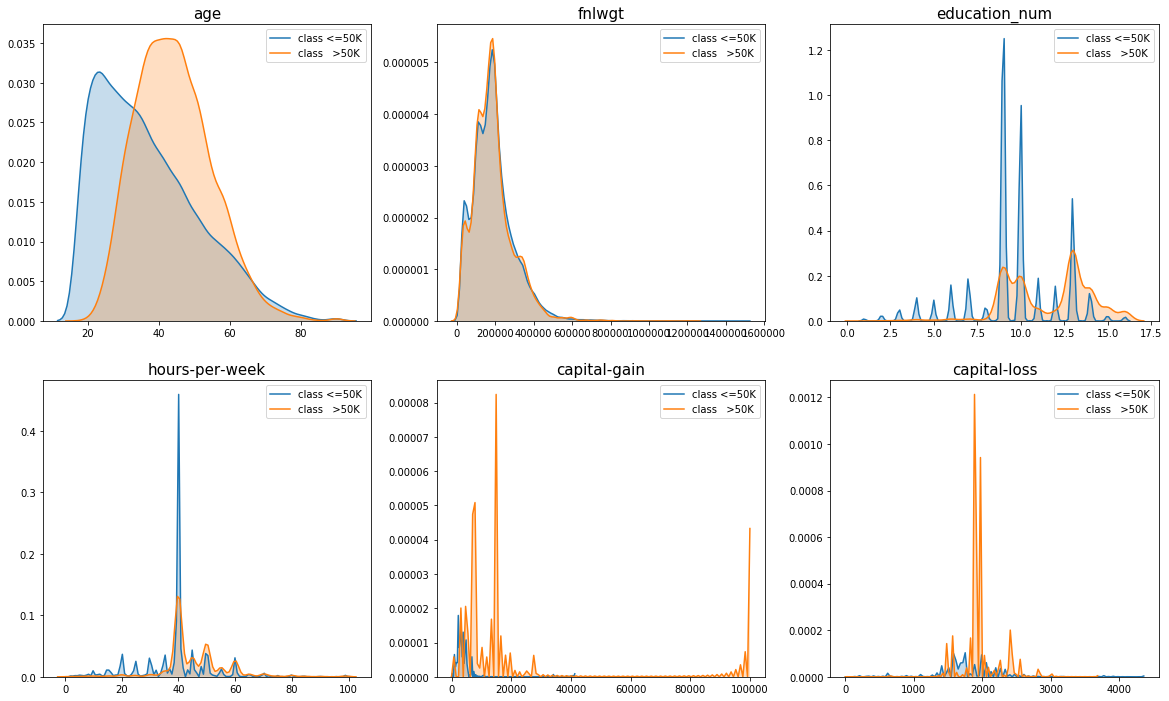

In [ ]:
# посмотрим на распределение числовых признаков

plt.figure(figsize=(20,12))
plt.subplot(221)

i=0
for x in col_var:
    plt.subplot(2, 3, i+1)
    i += 1
    ax1 = sns.kdeplot(df_adult[df_adult['class'] == '<=50K'][x], shade=True, label="class <=50K")
    sns.kdeplot(df_adult[df_adult['class'] == '>50K'][x], shade=True, label="class   >50K", ax=ax1)
    plt.title(x, fontsize=15)

plt.show()

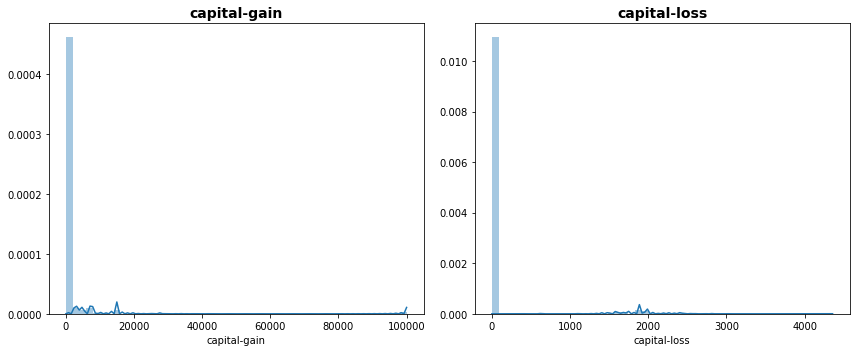

In [ ]:
# посмотрим отдельно на capital-gain и capital-loss

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1), sns.distplot(df_adult['capital-gain']), plt.title('capital-gain', fontsize=14, fontweight='bold')
plt.subplot(1, 2, 2), sns.distplot(df_adult['capital-loss']), plt.title('capital-loss', fontsize=14, fontweight='bold')
plt.tight_layout()

In [ ]:
print('Доля capital-gain = 0' + ':', round(df_adult[df_adult['capital-gain']==0]['capital-gain'].count() / df_adult.shape[0] * 100))
print('Доля capital-loss = 0' + ':', round(df_adult[df_adult['capital-loss']==0]['capital-loss'].count() / df_adult.shape[0] * 100))

Доля capital-gain = 0: 92.0
Доля capital-loss = 0: 95.0


In [ ]:
col_cat = ['workclass', 'race', 'sex', 'occupation', 'education', 'relationship', 'marital_status']

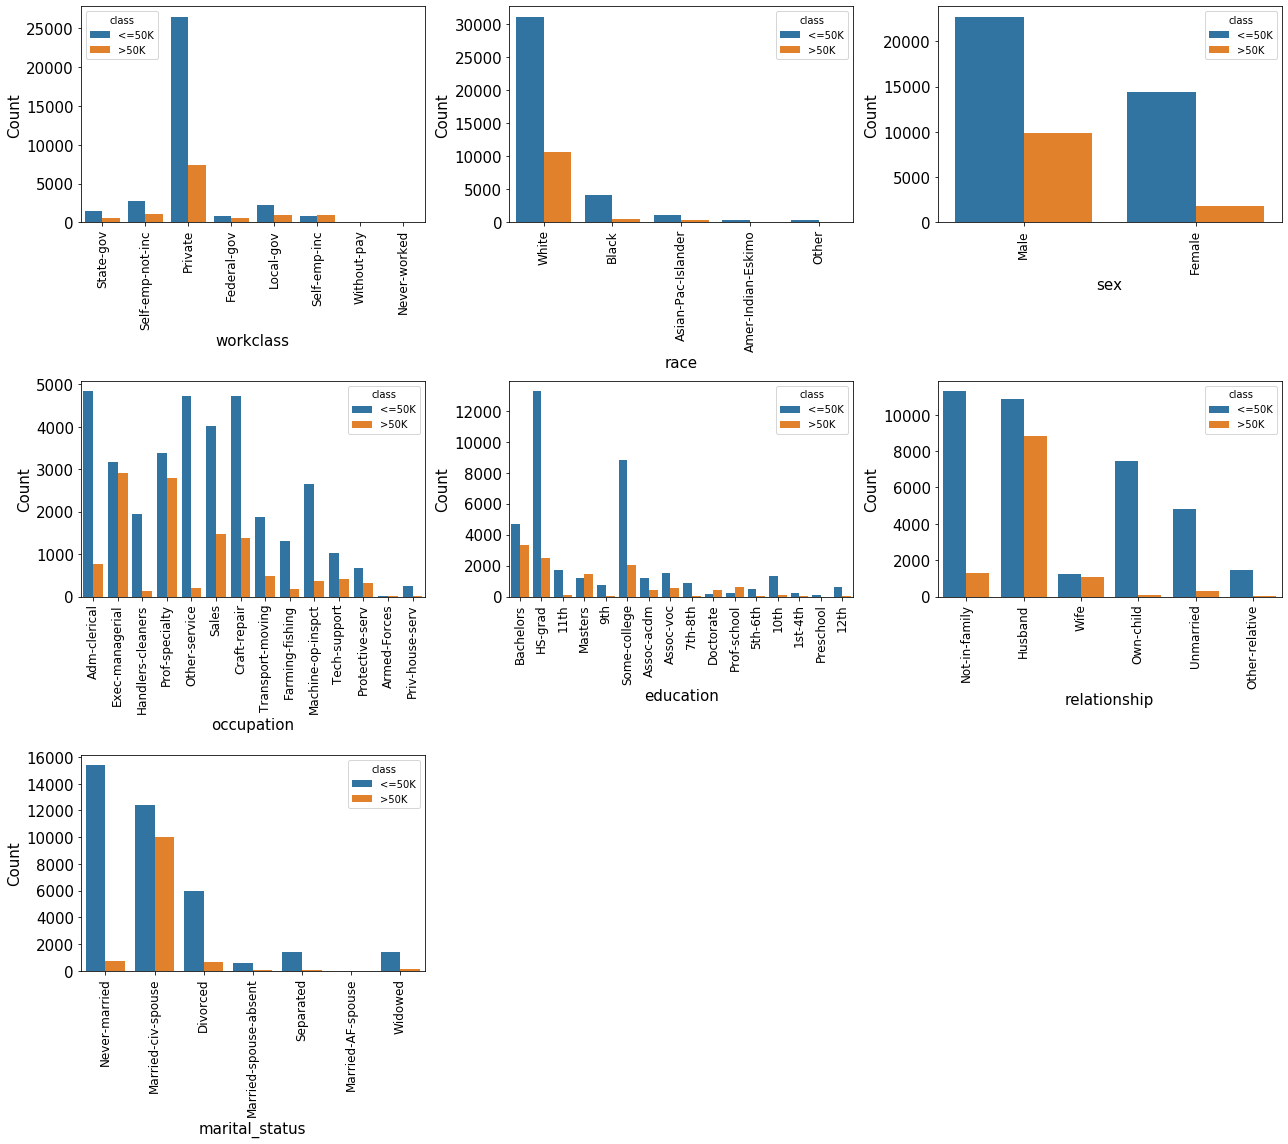

In [ ]:
# посмотрим на распределение категориальных признаков

plt.figure(figsize=(18,16))

for i in range(7):
    plt.subplot(3,3,i+1)
    sns.countplot(x=col_cat[i], data=df_adult, hue='class')
    plt.xlabel(col_cat[i], fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
# некоторые признаки являются нерепрезентативными, например, fnlwgt
# признаки capital-gain и capital-loss в большинстве случаев принимают одно и то же значение
# удалим эти признаки

df_adult.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

Удаление строк, в которых есть отсутствующие значения

In [ ]:
# заменим значения '?' на Nan
# удалим строки, в которых есть недостающие значения

df_adult.replace('?', np.nan, inplace=True)
df_adult_del = df_adult.dropna()

In [ ]:
# проверим результат

print('Недостающие признаки по классам:')
print('-' * 32)

for column in list(df_adult_del.columns):
  print(column + ':', df_adult_del[df_adult_del[column]=='?'][column].count())

Недостающие признаки по классам:
--------------------------------
age: 0
workclass: 0
education: 0
education_num: 0
marital_status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
hours-per-week: 0
native-country: 0
class: 0


In [ ]:
# посмотрим какую часть данных мы удалили

print((df_adult.shape[0] - df_adult_del.shape[0]) / df_adult.shape[0] * 100)

7.411653904426519


In [ ]:
df_adult_del.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
# разделим признаки по типу

missing_feat = ['workclass', 'occupation', 'native-country']
categorical_feat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_feat = ['age', 'education_num', 'hours-per-week']
target = 'class'

In [ ]:
# категориальные признаки закодируем с помощью LabelEncoder

lab_enc = LabelEncoder()

df_adult_del[categorical_feat] = df_adult_del[categorical_feat].apply(lambda col: lab_enc.fit_transform(col))
df_adult_del['class'] = lab_enc.fit_transform(df_adult_del['class'])

df_adult_del.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,5,9,13,4,0,1,4,1,40,38,0
1,50,4,9,13,2,3,0,4,1,13,38,0
2,38,2,11,9,0,5,1,4,1,40,38,0
3,53,2,1,7,2,5,0,2,1,40,38,0
4,28,2,9,13,2,9,5,2,0,40,4,0


In [ ]:
# посмотрим на количество классов для каждого признака

print('class             ', df_adult_del['class'].nunique())
print(df_adult_del[categorical_feat].nunique())

class              2
workclass          7
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64


In [ ]:
# разделим датасет на тренировочную и тестовую выборки

X_train_del = df_adult_del.iloc[:size_adult, :-1]
y_train_del = df_adult_del['class'].iloc[:size_adult]
X_test_del = df_adult_del.iloc[:-size_adult, :-1]
y_test_del = df_adult_del['class'].iloc[:-size_adult]

In [ ]:
# выберем scaler на примере LogisticRegression

scalers = MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer()
scalers_name = [
      'Минимакс(MinMaxScaler)',
      'Z-нормализация(StandardScaler)',
      'Устойчивая нормализация(RobustScaler)',
      'Квантильное преобразование(QuantileTransformer)',
      'Степенное преобразование(PowerTransformer)'
      ]
n = 0
  
while n < len(scalers_name):
    for scaler in scalers:
        scaled_train = pd.DataFrame(scaler.fit_transform(X_train_del[numerical_feat]), columns=numerical_feat)
        scaled_test = pd.DataFrame(scaler.transform(X_test_del[numerical_feat]), columns=numerical_feat)

        scaled_train = pd.concat([scaled_train, X_train_del[categorical_feat].reset_index()], axis=1)
        scaled_test = pd.concat([scaled_test, X_test_del[categorical_feat].reset_index()], axis=1)

        log_model = LogisticRegression()
        log_model.fit(scaled_train, y_train_del)
        y_pred = log_model.predict(scaled_test)
        acc_log = accuracy_score(y_test_del, y_pred)

        print('Scaler:', scalers_name[n])
        print('accuracy_score:', acc_log)
        print()
        n += 1

Scaler: Минимакс(MinMaxScaler)
accuracy_score: 0.7500987283784851

Scaler: Z-нормализация(StandardScaler)
accuracy_score: 0.7951978516704842

Scaler: Устойчивая нормализация(RobustScaler)
accuracy_score: 0.7795592765184425

Scaler: Квантильное преобразование(QuantileTransformer)
accuracy_score: 0.7493878840533923

Scaler: Степенное преобразование(PowerTransformer)
accuracy_score: 0.7948029381565437



In [ ]:
# применим StandardScaler() к числовым признакам

scaler = StandardScaler()

X_train_del[numerical_feat] = scaler.fit_transform(X_train_del[numerical_feat])
X_test_del[numerical_feat] = scaler.transform(X_test_del[numerical_feat])

X_train_del.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.042308,5,9,1.125246,4,0,1,4,1,-0.078864,38
1,0.879482,4,9,1.125246,2,3,0,4,1,-2.335732,38
2,-0.033798,2,11,-0.438992,0,5,1,4,1,-0.078864,38
3,1.107802,2,1,-1.221111,2,5,0,2,1,-0.078864,38
4,-0.794865,2,9,1.125246,2,9,5,2,0,-0.078864,4


In [ ]:
# протестируем модели с GridSearchCV
# KNeighborsClassifier

knn_model = KNeighborsClassifier()

gs_knn = GridSearchCV(
        knn_model,
        param_grid={'n_neighbors': list(range(1, 10)),
                    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
        cv=3,
        scoring='accuracy'
        )
gs_knn.fit(X_train_del, y_train_del)

knn_model = knn_model.set_params(**gs_knn.best_params_)
knn_model.fit(X_train_del, y_train_del)

acc_knn = knn_model.score(X_test_del, y_test_del)

print('best_parameters:', gs_knn.best_params_)
print('accuracy:', acc_knn)

best_parameters: {'metric': 'manhattan', 'n_neighbors': 8}
accuracy: 0.8552247057894321


In [ ]:
# LogisticRegression

log_model = LogisticRegression()

gs_log = GridSearchCV(
        log_model,
        param_grid={'C': np.arange(0.1, 10),
                    'penalty': ['l1', 'l2'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
        cv=3,
        scoring='accuracy',
        )
    
gs_log.fit(X_train_del, y_train_del)

log_model = log_model.set_params(**gs_log.best_params_)
log_model.fit(X_train_del, y_train_del)

acc_log = log_model.score(X_test_del, y_test_del)

print('best_parameters:', gs_log.best_params_)
print('accuracy:', acc_log)

best_parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.800410710054498


In [ ]:
# SVM
# подберем ядро и параметр C

clf_svm = SVC()

gs_svm = GridSearchCV(
    clf_svm,
    param_grid={
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 5]
    }
)
gs_svm.fit(X_train_del, y_train_del)

clf_svm = SVC(**gs_svm.best_params_)
clf_svm.fit(X_train_del, y_train_del)

acc_svm = clf_svm.score(X_test_del, y_test_del)

print('best_parameters:', gs_svm.best_params_)
print('accuracy:', acc_svm)

best_parameters: {'C': 5, 'kernel': 'poly'}
accuracy: 0.811784219255983


Замена отсутствующих значений наиболее часто встречающимися в признаке

In [ ]:
df_adult_freq = df_adult.copy()

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_adult_freq[missing_feat] = imputer.fit_transform(df_adult_freq[missing_feat])

df_adult_freq.shape

(48842, 12)

In [ ]:
# категориальные признаки закодируем с помощью LabelEncoder

lab_enc = LabelEncoder()

df_adult_freq[categorical_feat] = df_adult_freq[categorical_feat].apply(lambda col: lab_enc.fit_transform(col))
df_adult_freq['class'] = lab_enc.fit_transform(df_adult_freq['class'])

df_adult_freq.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,6,9,13,4,0,1,4,1,40,38,0
1,50,5,9,13,2,3,0,4,1,13,38,0
2,38,3,11,9,0,5,1,4,1,40,38,0
3,53,3,1,7,2,5,0,2,1,40,38,0
4,28,3,9,13,2,9,5,2,0,40,4,0


In [ ]:
# дискретные признаки также приведем к категориальным значениям

est_adult = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_est_adult = est_adult.fit_transform(df_adult_freq[numerical_feat])
X_est_adult = pd.DataFrame(X_est_adult, columns=numerical_feat)

X_est_adult.head()

,age,education_num,hours-per-week
0,1.0,3.0,1.0
1,1.0,3.0,0.0
2,1.0,2.0,1.0
3,1.0,1.0,1.0
4,0.0,3.0,1.0


In [ ]:
# объединим их с остальными признаками

df_est_adult = pd.concat([X_est_adult, df_adult_freq[categorical_feat].reset_index()], axis=1)
df_est_adult = df_est_adult.drop(['index'], axis=1)

df_est_adult.head()

,age,education_num,hours-per-week,workclass,education,marital_status,occupation,relationship,race,sex,native-country
0,1.0,3.0,1.0,6,9,4,0,1,4,1,38
1,1.0,3.0,0.0,5,9,2,3,0,4,1,38
2,1.0,2.0,1.0,3,11,0,5,1,4,1,38
3,1.0,1.0,1.0,3,1,2,5,0,2,1,38
4,0.0,3.0,1.0,3,9,2,9,5,2,0,4


In [ ]:
# разделим датасет на тренировочную и тестовую выборки

X_train_freq = df_est_adult.iloc[:size_adult, :]
y_train_freq = df_adult['class'].iloc[:size_adult]
X_test_freq = df_est_adult.iloc[:-size_adult, :]
y_test_freq = df_adult['class'].iloc[:-size_adult]

In [ ]:
# применим CategoricalNB

clf = CategoricalNB()
clf.fit(X_train_freq, y_train_freq)
print(clf.score(X_test_freq, y_test_freq))

0.8108838523432221


In [ ]:
# SVM
# подберем ядро и параметр C

clf_svm = SVC()

gs_svm = GridSearchCV(
    clf_svm,
    param_grid={
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 5]
    }
)
gs_svm.fit(X_train_freq, y_train_freq)

clf_svm = SVC(**gs_svm.best_params_)
clf_svm.fit(X_train_freq, y_train_freq)

acc_svm = clf_svm.score(X_test_freq, y_test_freq)

print('best_parameters:', gs_svm.best_params_)
print('accuracy:', acc_svm)

best_parameters: {'C': 5, 'kernel': 'rbf'}
accuracy: 0.8081813156440022


Введение новой категории для недостающих значений

In [ ]:
df_adult_cat = df_adult.copy()

df_adult_cat.replace(np.nan, 'new_class', inplace=True)

lab_enc = LabelEncoder()

df_adult_cat[categorical_feat] = df_adult_cat[categorical_feat].apply(lambda col: lab_enc.fit_transform(col))
df_adult_cat['class'] = lab_enc.fit_transform(df_adult_cat['class'])

df_adult_cat.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,6,9,13,4,0,1,4,1,40,38,0
1,50,5,9,13,2,3,0,4,1,13,38,0
2,38,3,11,9,0,5,1,4,1,40,38,0
3,53,3,1,7,2,5,0,2,1,40,38,0
4,28,3,9,13,2,9,5,2,0,40,4,0


In [ ]:
# к категориальным признакам - dummy-кодирование

df_adult_cat = pd.get_dummies(df_adult_cat, prefix='dummy', columns=categorical_feat)
df_adult_cat.head()

,age,education_num,hours-per-week,class,dummy_0,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_0,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12,dummy_13,dummy_14,dummy_15,dummy_0,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_0,dummy_1,dummy_2,dummy_3,...,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12,dummy_13,dummy_14,dummy_15,dummy_16,dummy_17,dummy_18,dummy_19,dummy_20,dummy_21,dummy_22,dummy_23,dummy_24,dummy_25,dummy_26,dummy_27,dummy_28,dummy_29,dummy_30,dummy_31,dummy_32,dummy_33,dummy_34,dummy_35,dummy_36,dummy_37,dummy_38,dummy_39,dummy_40,dummy_41
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# разделим датасет на тренировочную и тестовую выборки

X_train_cat = df_adult_cat.iloc[:size_adult, :].drop(['class'], axis=1)
y_train_cat = df_adult_cat['class'].iloc[:size_adult]
X_test_cat = df_adult_cat.iloc[:-size_adult, :].drop(['class'], axis=1)
y_test_cat = df_adult_cat['class'].iloc[:-size_adult]

In [ ]:
# к числовым признакам применим нормализацию

scaler = StandardScaler()

X_train_cat[numerical_feat] = scaler.fit_transform(X_train_cat[numerical_feat])
X_test_cat[numerical_feat] = scaler.transform(X_test_cat[numerical_feat])

X_train_cat[numerical_feat].head()

,age,education_num,hours-per-week
0,0.030671,1.134739,-0.035429
1,0.837109,1.134739,-2.222153
2,-0.042642,-0.420060,-0.035429
3,1.057047,-1.197459,-0.035429
4,-0.775768,1.134739,-0.035429


In [ ]:
# протестируем модели с GridSearchCV
# KNeighborsClassifier

knn_model = KNeighborsClassifier()

gs_knn = GridSearchCV(
        knn_model,
        param_grid={'n_neighbors': list(range(1, 10)),
                    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
        cv=3,
        scoring='accuracy'
        )
gs_knn.fit(X_train_cat, y_train_cat)

knn_model = knn_model.set_params(**gs_knn.best_params_)
knn_model.fit(X_train_cat, y_train_cat)

acc_knn = knn_model.score(X_test_cat, y_test_cat)

print('best_parameters:', gs_knn.best_params_)
print('accuracy:', acc_knn)

best_parameters: {'metric': 'manhattan', 'n_neighbors': 9}
accuracy: 0.8565198697868681


In [ ]:
# SVM
# подберем ядро

clf_svm = SVC()

gs_svm = GridSearchCV(
    clf_svm,
    param_grid={
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
)
gs_svm.fit(X_train_cat, y_train_cat)

clf_svm = SVC(**gs_svm.best_params_)
clf_svm.fit(X_train_cat, y_train_cat)

acc_svm = clf_svm.score(X_test_cat, y_test_cat)

print('best_parameters:', gs_svm.best_params_)
print('accuracy:', acc_svm)

best_parameters: {'kernel': 'linear'}
accuracy: 0.8340396781524476


###При использовании разных способов для работы с отсутствующими значениями и обработки признаков лучшие результаты показал KNeighborsClassifier.